In [1]:
##### 读取3D相机的高度文件

In [1]:
import open3d as o3d
from PIL import Image

# Load PLY file
ply = o3d.io.read_point_cloud(rf'J:\烟丝\0603\aishangliaohou\ImageData_2025-06-03_16-17-03\point.ply')
o3d.visualization.draw_geometries([ply])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
import open3d as o3d
from PIL import Image

# Load PLY file
ply = o3d.io.read_point_cloud(rf"G:\yansi0619\3D\aishangliaohou\ImageData_2025-06-19_16-55-50\point.ply")
o3d.visualization.draw_geometries([ply])

# Open and display PNG file
img = Image.open(rf"G:\yansi0619\3D\aishangliaohou\ImageData_2025-06-19_16-55-50\depth.png")
img.show()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [73]:
np.array(img).reshape(-1)

array([0, 0, 0, ..., 0, 0, 0], shape=(1253376,), dtype=uint16)

In [75]:
range(np.array(img).shape[0])

range(0, 1024)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
img = Image.open(rf"G:\yansi0619\3D\aishangliaohou\ImageData_2025-06-19_16-55-50\depth.png")
# Assuming 'img' is a 2D numpy array
img = np.array(img)

# Create a meshgrid for the x and y coordinates
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))

# Flatten the x, y, and img data to be used in a scatter plot
x = x.flatten()
y = y.flatten()
z = img.flatten()  # Assuming 'img' contains the intensity values

# Set the min and max values for z to filter the range
z_min = 50  # Set the desired minimum intensity value
z_max = 35000  # Set the desired maximum intensity value

# Apply the condition to filter z values within the desired range
mask = (z >= z_min) & (z <= z_max)
x = x[mask]
y = y[mask]
z = z[mask]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='jet', marker='o')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Intensity')

# Color bar
fig.colorbar(scatter)

plt.title(f'3D Scatter Plot of img (Filtered Intensity: {z_min} to {z_max})')

plt.show()

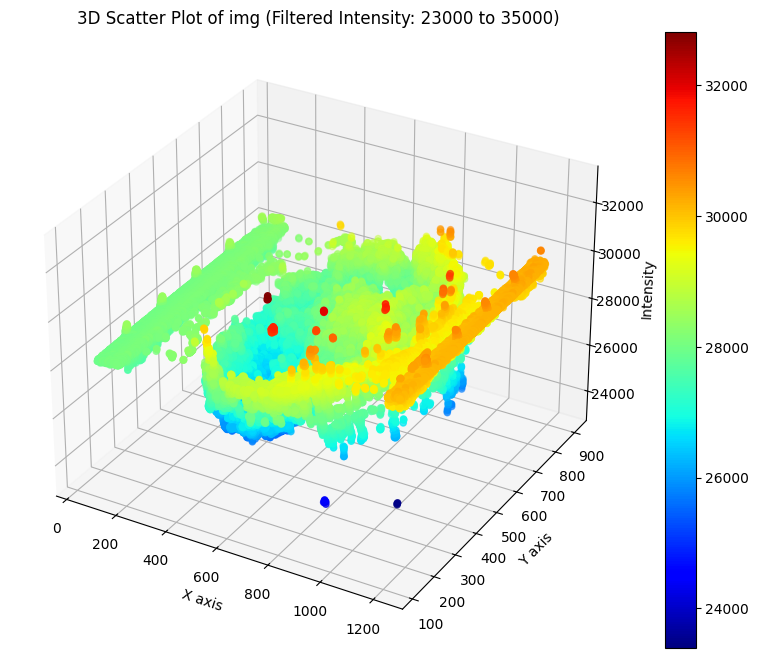

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
img = Image.open(rf"J:\烟丝\0603\aishangliaohou\ImageData_2025-06-03_16-17-03\depth.png")
# Assuming 'img' is a 2D numpy array
img = np.array(img)

# Create a meshgrid for the x and y coordinates
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))

# Flatten the x, y, and img data to be used in a scatter plot
x = x.flatten()
y = y.flatten()
z = img.flatten()  # Assuming 'img' contains the intensity values

# Set the min and max values for z to filter the range
z_min = 23000  # Set the desired minimum intensity value
z_max = 35000  # Set the desired maximum intensity value

# Apply the condition to filter z values within the desired range
mask = (z >= z_min) & (z <= z_max)
x = x[mask]
y = y[mask]
z = z[mask]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='jet', marker='o')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Intensity')

# Color bar
fig.colorbar(scatter)

plt.title(f'3D Scatter Plot of img (Filtered Intensity: {z_min} to {z_max})')

plt.show()

In [ ]:
from plyfile import PlyData

# 读取 PLY 文件
ply_data = PlyData.read(rf"G:\yansi0619\3D\aishangliaohou\ImageData_2025-06-19_16-55-50\point.ply")

# 访问顶点数据
vertices = ply_data['vertex']
x = vertices['x']  # X坐标数组
y = vertices['y']  # Y坐标数组
z = vertices['z']  # 高度数组

# 访问颜色数据（如果存在）
if 'red' in vertices.data.dtype.names:
    r = vertices['red']
    g = vertices['green']
    b = vertices['blue']

# 访问面片数据（如果存在）
# if 'face' in ply_data.elements_dict:
#     faces = ply_data['face']
#     triangles = faces['vertex_index']  # 三角面片顶点索引

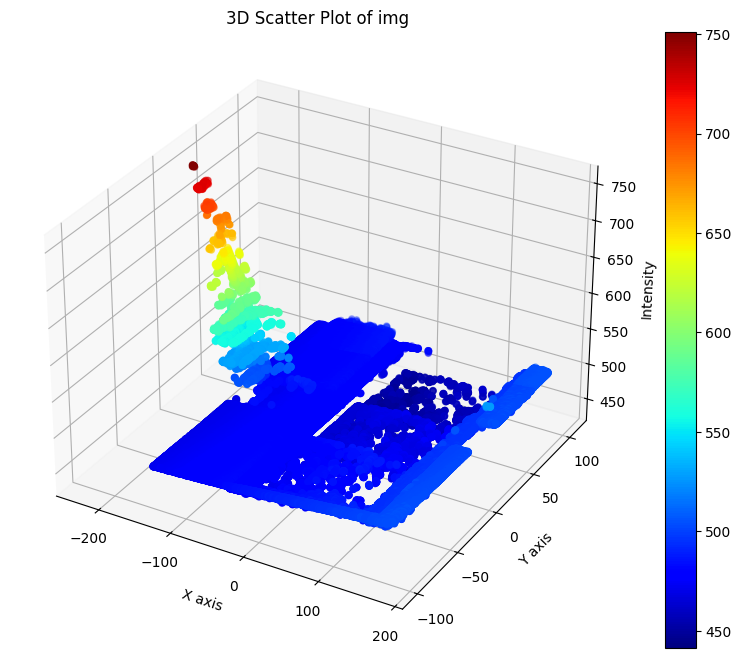

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='jet', marker='o')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Intensity')

# Color bar
fig.colorbar(scatter)

plt.title('3D Scatter Plot of img')

plt.show()

In [4]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import spectral
import glob


class ImgRegistration:
    def __init__(self, matrix_path, msi_board_path, rgb_board_path):
        self.matrix_path = matrix_path
        self.msi_board_path = msi_board_path
        self.rgb_board_path = rgb_board_path

    def get_rectify_M(self):
        """
        获取图像配准变换矩阵M
        1.显示特征匹配图片  2.显示模板图片对正效果图
        """
        msi = spectral.open_image(self.msi_board_path).load()
        spe_gray = (msi[:, :, 30] / 4).astype(np.uint8)
        RGB_img = cv.imdecode(np.fromfile(self.rgb_board_path, dtype=np.uint8), 0)
        rgb_gray = RGB_img
        sift = cv.SIFT_create()
        # 利用SIFT算法寻找特征点
        kp1, des1 = sift.detectAndCompute(spe_gray, None)
        kp2, des2 = sift.detectAndCompute(rgb_gray, None)
        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1, des2, k=2)

        # Need to draw only good matches, so create a mask
        matchesMask = [[0, 0] for i in range(len(matches))]

        good = []
        pts1 = []
        pts2 = []
        # ratio test as per Lowe's paper
        for i, (m, n) in enumerate(matches):
            if m.distance < 0.6 * n.distance:
                good.append(m)
                pts2.append(kp2[m.trainIdx].pt)
                pts1.append(kp1[m.queryIdx].pt)
                matchesMask[i] = [1, 0]

        draw_params = dict(matchColor=(0, 255, 0),
                           singlePointColor=(255, 0, 0),
                           matchesMask=matchesMask,
                           flags=0)
        img3 = cv.drawMatchesKnn(spe_gray, kp1, rgb_gray, kp2, matches, None, **draw_params)
        # plt.title('feature matching')
        # plt.imshow(img3)
        # plt.show()
        rows, cols = spe_gray.shape[:2]
        MIN_MATCH_COUNT = 10
        if len(good) > MIN_MATCH_COUNT:
            src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
            dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
            M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
        else:
            raise Exception("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        np.save(self.matrix_path, M)
        return 

    def rectify_msi(self, msi_floder_path , save_path):

        msi_path = glob.glob(f'{msi_floder_path}/*.hdr')
        M = np.load(self.matrix_path+'.npy')
        rgb_img = cv.imdecode(np.fromfile(self.rgb_board_path, dtype=np.uint8), 0)
        rows, cols = rgb_img.shape[:2]
        msi = spectral.open_image(msi_path[0]).load()
        msi_imgs = (msi / 4).astype(np.uint8)
        self.warpImgs = cv.warpPerspective(msi_imgs, np.linalg.inv(M), (cols, rows), flags=cv.WARP_INVERSE_MAP)
        
        for i in range(30):
         cv.imwrite(os.path.join(save_path , f'{i + 1}.png'), self.warpImgs[:, :, i])

        return 

In [5]:
# 帮我写了一个测试代码，你可以直接运行这个代码，看看效果
# 你需要修改的地方是，matrix_path，msi_board_path，rgb_board_path，save_path，msi_floder_path
# matrix_path是矩阵保存地址，msi_board_path是msi标定板地址，rgb_board_path是rgb标定板地址，save_path是保存地址，msi_floder_path是msi图像地址
matrix_path = r'D:\code\黄斑识别2'
msi_board_path = r'G:\peizhun\biaodingban-180236\2\biaodingban.hdr'
rgb_board_path = r'G:\peizhun\biaodingban-180236\2\biaodingban.png'

save_path = rf'G:\yellowspot_cigarette\dt\sdy-dt-203710\sdy-dt_20240617203710\2'
msi_floder_path =  save_path

reg  = ImgRegistration(matrix_path ,msi_board_path, rgb_board_path)
reg.get_rectify_M()
reg.rectify_msi(msi_floder_path , save_path)

# 得到reg类里面的全局变量warpImgs，是配准后的图像，输出warpImgs
reg.warpImgs.shape

C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


(2048, 2448, 31)

In [ ]:
# 画个图
plt.imshow(reg.warpImgs[:,:,0])  # 0是第一个波段
plt.show()


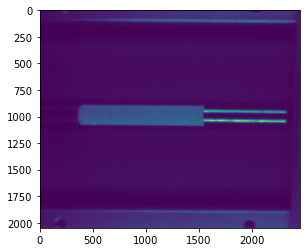

In [8]:
# plt显示warpImgs图像             
import matplotlib.pyplot as plt
plt.imshow(reg.warpImgs[:,:,10])   